In [1]:
import numpy as np
import gymnasium
import neurolib.control.reinforcement_learning
import matplotlib.pyplot as plt

In [2]:
env = gymnasium.make('StateSwitching-v0', l1_control_strength_loss_scale=0.005, l2_control_strength_loss_scale=0.0)

# Random Agent

In [3]:
observation, info = env.reset()

observations = []
rewards = []
actions = []

while True:
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)
    observations.append(observation)
    rewards.append(reward)
    actions.append(action)
    
    if terminated or truncated:
        observation, info = env.reset()
        break

excs = np.array([obs["exc"].item() for obs in observations])
inhs = np.array([obs["inh"].item() for obs in observations])
actions = np.array(actions)[:, :, 0]
rewards = np.array(rewards)

In [4]:
rewards.sum()

-536.4358343356369

Text(0.5, 0, 'timestep')

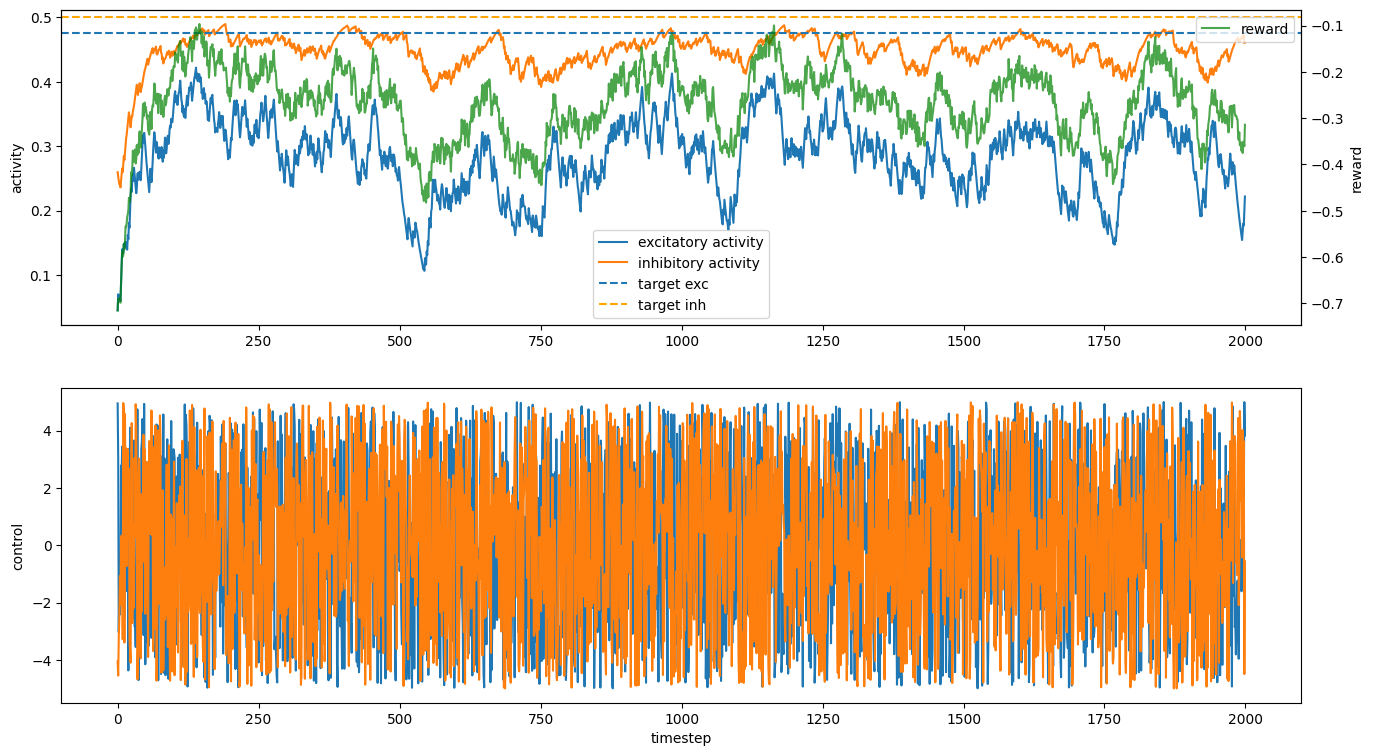

In [5]:
plt.figure(figsize=(16, 9))
plt.subplot(211)
plt.plot(excs, label='excitatory activity')
plt.plot(inhs, label='inhibitory activity')
plt.axhline(env.unwrapped.targetstate[0], linestyle='--', label='target exc')
plt.axhline(env.unwrapped.targetstate[1], linestyle='--', c='orange', label='target inh')
plt.ylabel('activity')
plt.legend()
plt.twinx()
plt.plot(rewards, c='g', alpha=0.7, label='reward')
plt.ylabel('reward')
plt.legend()
plt.subplot(212)
plt.plot(actions)
plt.ylabel('control')
plt.xlabel('timestep')

Text(0, 0.5, '$\\frac{d}{dt}$ reward')

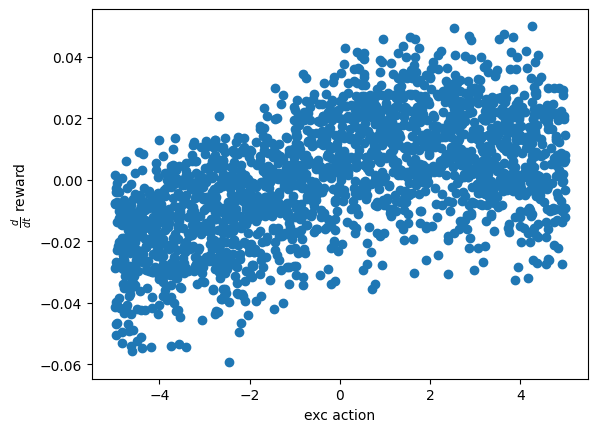

In [6]:
plt.scatter(actions[1:, 0], rewards[1:] - rewards[:-1])
plt.xlabel('exc action')
plt.ylabel(r'$\frac{d}{dt}$ reward')

Text(0, 0.5, '$\\frac{d}{dt}$ reward')

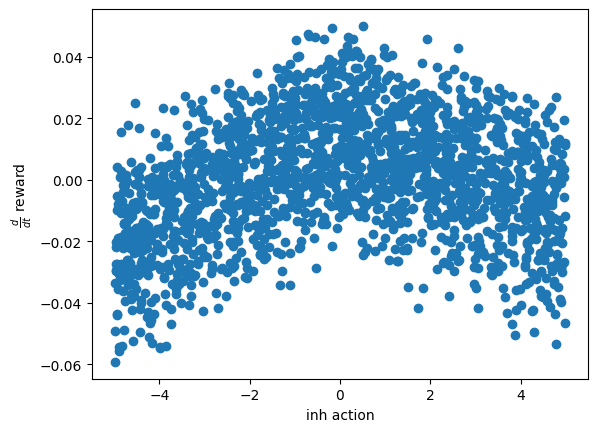

In [7]:
plt.scatter(actions[1:, 1], rewards[1:] - rewards[:-1])
plt.xlabel('inh action')
plt.ylabel(r'$\frac{d}{dt}$ reward')

# Constant Input Agent

In [8]:
observation, info = env.reset()

observations = []
rewards = []
actions = []

while True:
    action = (np.array([1]), np.array([-1]))
    observation, reward, terminated, truncated, info = env.step(action)
    observations.append(observation)
    rewards.append(reward)
    actions.append(action)
    
    if terminated or truncated:
        observation, info = env.reset()
        break

excs = np.array([obs["exc"].item() for obs in observations])
inhs = np.array([obs["inh"].item() for obs in observations])
actions = np.array(actions)[:, :, 0]
rewards = np.array(rewards)

In [9]:
rewards.sum()

-88.98734633369575

Text(0.5, 0, 'timestep')

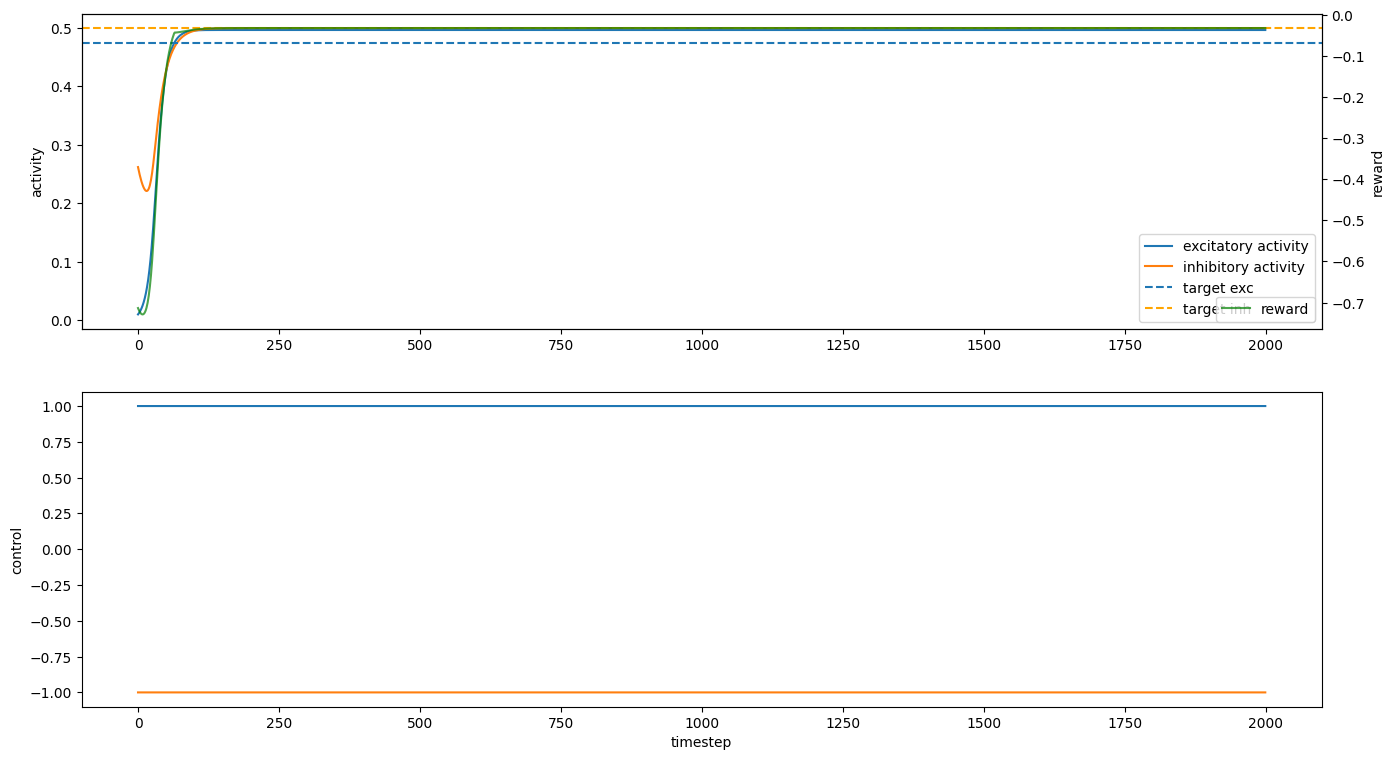

In [10]:
plt.figure(figsize=(16, 9))
plt.subplot(211)
plt.plot(excs, label='excitatory activity')
plt.plot(inhs, label='inhibitory activity')
plt.axhline(env.unwrapped.targetstate[0], linestyle='--', label='target exc')
plt.axhline(env.unwrapped.targetstate[1], linestyle='--', c='orange', label='target inh')
plt.ylabel('activity')
plt.legend()
plt.twinx()
plt.plot(rewards, c='g', alpha=0.7, label='reward')
plt.ylabel('reward')
plt.legend()
plt.subplot(212)
plt.plot(actions)
plt.ylabel('control')
plt.xlabel('timestep')